<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

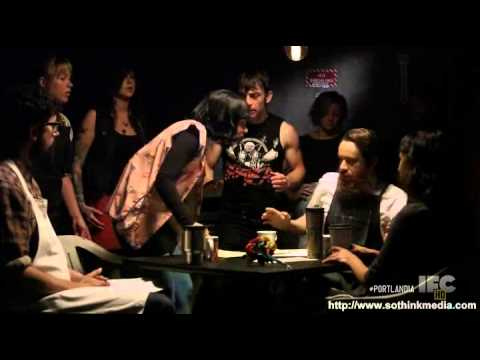

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\Toby\\Desktop\\Lambda Files\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [5]:
shops.shape

(7616, 3)

In [6]:
shops['full_review_text'].dtypes

dtype('O')

In [7]:
def clean(text):
    text_updated = re.sub('[^\s*a-zA-Z\+]','', text)
    text_updated = text_updated.lower()
    return text_updated
shops['full_review_text_clean'] = shops['full_review_text'].apply(clean)
shops['full_review_text_clean']

0          checkin love love loved the atmosphere ever...
1         listed in date night austin ambiance in aust...
2          checkin listed in brunch spots i loved the ...
3         very cool decor good drinks nice seating  ho...
4          checkin they are located within the northcr...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok the steeping room is awesome how do they ...
7613      loved coming here for tea and the atmosphere...
7614      the food is just average the booths didnt fe...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text_clean, Length: 7616, dtype: object

In [8]:
# This one is a very huge output so I comment it out.
# shops['full_review_text_clean'].value_counts()[:50]

In [9]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    # Split with whitespaces. Instead of string we get back a list.
    tokens = tokens.lower().split()
    tokens_popped = tokens.pop(0)
    
    return tokens

shops['tokens'] = shops['full_review_text_clean'].apply(tokenize)
shops['tokens'].head()

for doc in shops['tokens']:
    doc.pop(0)
shops['tokens']

0       [love, loved, the, atmosphere, every, corner, ...
1       [date, night, austin, ambiance, in, austin, be...
2       [in, brunch, spots, i, loved, the, eclectic, a...
3       [decor, good, drinks, nice, seating, however, ...
4       [are, located, within, the, northcross, mall, ...
                              ...                        
7611    [step, into, this, restaurant, by, chance, and...
7612    [steeping, room, is, awesome, how, do, they, h...
7613    [here, for, tea, and, the, atmosphere, was, pr...
7614    [is, just, average, the, booths, didnt, feel, ...
7615    [stopped, in, for, lunch, with, my, colleague,...
Name: tokens, Length: 7616, dtype: object

In [10]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text_clean'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

shops['tokens']

0       [   , checkin, love, love, loved, atmosphere, ...
1       [  , listed, date, night, austin, ambiance, au...
2       [   , checkin, listed, brunch, spots, loved, e...
3       [  , cool, decor, good, drinks, nice, seating,...
4       [   , checkin, located, northcross, mall, shop...
                              ...                        
7611    [  , actually, step, restaurant, chance, favor...
7612    [  , ok, steeping, room, awesome, great, menu,...
7613    [  , loved, coming, tea, atmosphere, pretty, f...
7614    [  , food, average, booths, didnt, feel, clean...
7615    [  , finally, stopped, lunch, colleague, im, g...
Name: tokens, Length: 7616, dtype: object

In [11]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents.
# We are applying the counter to every element in the tokens column and updating it
# every x is a list of tokens in every row.
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words.
word_counts.most_common(10)

[(' ', 21778),
 ('coffee', 10351),
 ('  ', 5593),
 ('place', 5426),
 ('good', 3971),
 ('great', 3917),
 ('   ', 3482),
 ('like', 3088),
 ('austin', 2252),
 ('checkin', 1966)]

In [12]:
def star(text):
    # split it with dot.
    rating = text.split(".")[0]
    # split it with zero. Instead of string we get back a list.
    rating1 = rating.split("0")[0]
    return rating1

In [13]:
shops['star_rating'] = shops['star_rating'].apply(star)
shops['star_rating_int'] = shops['star_rating'].astype(int)
shops['star_rating_int']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: star_rating_int, Length: 7616, dtype: int32

In [14]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_clean,tokens,star_rating_int
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere ever...,"[ , checkin, love, love, loved, atmosphere, ...",5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,listed in date night austin ambiance in aust...,"[ , listed, date, night, austin, ambiance, au...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,checkin listed in brunch spots i loved the ...,"[ , checkin, listed, brunch, spots, loved, e...",4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,very cool decor good drinks nice seating ho...,"[ , cool, decor, good, drinks, nice, seating,...",2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,checkin they are located within the northcr...,"[ , checkin, located, northcross, mall, shop...",4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [15]:
# Also a very big output.
# word_counts

In [16]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [17]:
# Use the Function
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,,5401,21778,1.0,0.055546,0.055546,0.709165
42,coffee,4877,10351,2.0,0.026401,0.081947,0.640362
58,,5001,5593,3.0,0.014265,0.096212,0.656644
127,place,3659,5426,4.0,0.013839,0.110051,0.480436
155,good,2787,3971,5.0,0.010128,0.120179,0.365940


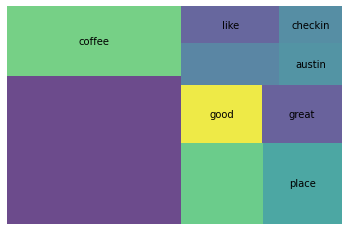

In [18]:
wc_top20 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [19]:
list(shops)

['coffee_shop_name',
 'full_review_text',
 'star_rating',
 'full_review_text_clean',
 'tokens',
 'star_rating_int']

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [20]:
#split the Dataset by rating 4-5 stars and 1-3 stars
shops_best = shops[shops['star_rating_int']>=4]
shops_worst = shops[shops['star_rating_int'] < 4]

In [21]:
shops_best = shops_best.sort_values(by=['star_rating_int'], ascending=False)
shops_best.shape

(6140, 6)

In [22]:
shops_worst = shops_worst.sort_values(by=['star_rating_int'], ascending=True)
shops_worst.shape

(1476, 6)

In [23]:
# Use the function for the best coffee shop.
wc_best = count(shops_best['tokens'])

In [24]:
# Use the function for the worst coffe shop.
wc_worst = count(shops_worst['tokens'])

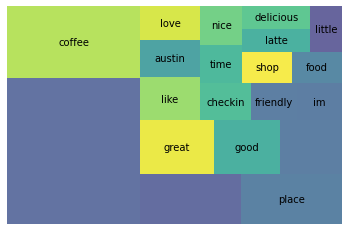

In [25]:
wc_best = count(shops_best['tokens'])

wc_top20_best = wc_best[wc_best['rank'] <= 20]

squarify.plot(sizes=wc_top20_best['pct_total'], label=wc_top20_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

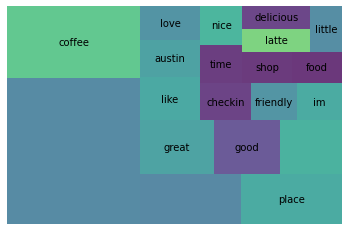

In [26]:
wc_worst = count(shops_best['tokens'])
wc_top20_worst = wc_worst[wc_worst['rank'] <= 20]

squarify.plot(sizes=wc_top20_worst['pct_total'], label=wc_top20_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [27]:
#Extending list of STOP WORDS based on the plot.
STOP_WORDS_BEST = nlp.Defaults.stop_words.union(['food', 'time', 'order', 'place', 'ive', 'im', 'checkin', '-.', 'austin!', 'check-ins', 'austin' ,'check-in', '', '1','it', ' ', '-', 'coffee', 'coffe', 'i', "i'm", "i've", "it's", 'it.', "it'", "tri", "drink"])

In [28]:
#Extending list of STOP WORDS based on the plot.
STOP_WORDS_WORST = nlp.Defaults.stop_words.union(['food', 'time', 'order', 'place', 'ive', 'im', 'checkin', '-.', 'austin!', 'check-ins', 'austin', 'check-in', '','1','it','-' ,' ','coffe','coffee', 'tast', 'i', "i'm", "i've", "it's", 'it.', "it'", 'tri', "drink"])

In [29]:
#removing STOP WORDS from the extended list again - BEST COFFEE SHOP
tokens1 = []

for doc in tokenizer.pipe(shops_best['full_review_text_clean'], batch_size=500):
    
    doc_tokens1 = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS_BEST:
            doc_tokens1.append(token.text.lower())
   
    tokens1.append(doc_tokens1)
    
shops_best['tokens'] = tokens1

shops_best['tokens']

0       [   , love, love, loved, atmosphere, corner, s...
4278    [  , love, free, wifi, indoor, outdoor, seatin...
4291    [   , checkins, simply, feel, welcome, coffees...
4289    [  , irie, bean, gem, atmosphere, decor, relax...
4287    [   , love, great, spot, hang, good, chai, tea...
                              ...                        
1552    [  , best, americano, girlfriend, pour, delici...
1549    [   , pretty, ambience, good, iced, chai, sad,...
1547    [   , listed, organic, liked, figure, s, hipst...
1532    [   , great, smooth, espresso, pour, light, fl...
7615    [  , finally, stopped, lunch, colleague, glad,...
Name: tokens, Length: 6140, dtype: object

In [30]:
def clean(text):
    text_updated = re.sub('[$/0-9]', '', text)
    text_updated = text_updated.lower()
    return text_updated

# for doc in shops['tokens']:
#     doc.pop(0)
# shops['tokens']

shops['full_review_text_clean'] = shops['full_review_text'].apply(clean)
shops['full_review_text_clean']

0          check-in love love loved the atmosphere! ev...
1         listed in date night: austin, ambiance in au...
2          check-in listed in brunch spots i loved the...
3         very cool decor! good drinks nice seating  h...
4          check-in they are located within the northc...
                              ...                        
7611      i actually step into this restaurant by chan...
7612      ok, the steeping room is awesome. how do the...
7613      loved coming here for tea, and the atmospher...
7614      the food is just average. the booths didn't ...
7615      i finally stopped in for lunch with my colle...
Name: full_review_text_clean, Length: 7616, dtype: object

In [31]:
#removing STOP WORDS from the extended list again - WORST COFFEE SHOP
tokens2 = []

for doc in tokenizer.pipe(shops_worst['full_review_text_clean'], batch_size=500):
    
    doc_tokens2 = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS_WORST:
            doc_tokens2.append(token.text.lower())
   
    tokens2.append(doc_tokens2)
    
shops_worst['tokens'] = tokens2

shops_worst['tokens']

5780    [  , bullshit, overhyped, paleo, pre, dry, bre...
5945    [   , ounce, iced, absolutely, insane, charge,...
5946    [  , normal, circumstances, id, given, stars, ...
5962    [  , standards, super, low, fact, didnt, like,...
5971    [  , horrible, slow, service, real, menu, item...
                              ...                        
5218    [   , toms, saved, pouring, rain, started, pou...
2440    [   , stars, cute, spot, downtown, area, pick,...
5247    [  , sunday, morning, breakfast, tacos, breakf...
5175    [  , fun, little, shopping, combined, sipped, ...
7614    [  , average, booths, didnt, feel, clean, wait...
Name: tokens, Length: 1476, dtype: object

In [32]:
wc_best = count(shops_best['tokens'])
wc_best.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
53,,3926,4341,1.0,0.016299,0.016299,0.639414
59,great,2490,3451,2.0,0.012958,0.029257,0.405537
115,good,2191,3095,3.0,0.011621,0.040878,0.356840
15,,2610,2897,4.0,0.010878,0.051756,0.425081
78,like,1559,2212,5.0,0.008306,0.060061,0.253909


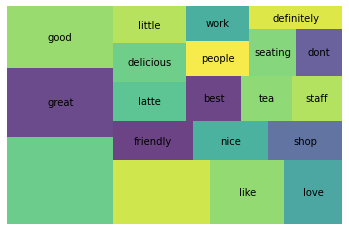

In [33]:
wc_top20_best = wc_best[wc_best['rank'] <= 20]
squarify.plot(sizes=wc_top20_best['pct_total'], label=wc_top20_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [34]:
wc_worst = count(shops_worst['tokens'])
wc_worst.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,,1075,1252,1.0,0.016708,0.016708,0.728320
86,like,565,876,2.0,0.011690,0.028399,0.382791
201,good,596,876,3.0,0.011690,0.040089,0.403794
21,,511,585,4.0,0.007807,0.047896,0.346206
15,great,344,466,5.0,0.006219,0.054115,0.233062


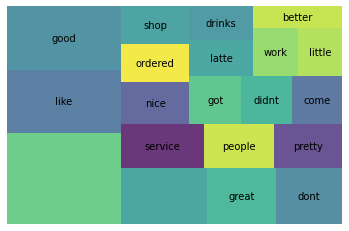

In [35]:
wc_top20_worst = wc_worst[wc_worst['rank'] <= 20]
squarify.plot(sizes=wc_top20_worst['pct_total'], label=wc_top20_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [36]:
# BEST COFFEE SHOP STEMMER
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# Put in a new column `stems`
shops_best['stems']=shops_best['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_best.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_clean,tokens,star_rating_int,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,checkin love love loved the atmosphere ever...,"[ , love, love, loved, atmosphere, corner, s...",5,"[ , love, love, love, atmospher, corner, sho..."
4278,Irie Bean Coffee Bar,8/14/2013 I love this place. The have free wi...,5,i love this place the have free wifi indoor ...,"[ , love, free, wifi, indoor, outdoor, seatin...",5,"[ , love, free, wifi, indoor, outdoor, seat, ..."
4291,Irie Bean Coffee Bar,"4/25/2012 5 check-ins Simply put, I feel welc...",5,checkins simply put i feel welcome here the...,"[ , checkins, simply, feel, welcome, coffees...",5,"[ , checkin, simpli, feel, welcom, coffe, gr..."
4289,Irie Bean Coffee Bar,11/4/2010 The Irie Bean is a gem. The atmosph...,5,the irie bean is a gem the atmosphere and de...,"[ , irie, bean, gem, atmosphere, decor, relax...",5,"[ , iri, bean, gem, atmospher, decor, relax, ..."
4287,Irie Bean Coffee Bar,4/3/2013 1 check-in I love this place. It's ...,5,checkin i love this place its such a great...,"[ , love, great, spot, hang, good, chai, tea...",5,"[ , love, great, spot, hang, good, chai, tea..."


In [37]:
# worst COFFEE SHOP STEMMER
from nltk.stem import PorterStemmer

ps = PorterStemmer()
# Put in a new column `stems`
shops_worst['stems']=shops_worst['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_worst.head()

,coffee_shop_name,full_review_text,star_rating,full_review_text_clean,tokens,star_rating_int,stems
5780,Picnik Austin,6/19/2016 Bullshit overhyped paleo 8$ coffee ...,1,bullshit overhyped paleo coffee with pre ma...,"[ , bullshit, overhyped, paleo, pre, dry, bre...",1,"[ , bullshit, overhyp, paleo, pre, dri, break..."
5945,Kick Butt Coffee Music & Booze,7/17/2015 $4.75 for a 20 ounce iced coffee? T...,1,for a ounce iced coffee this is absolutely...,"[ , ounce, iced, absolutely, insane, charge,...",1,"[ , ounc, ice, absolut, insan, charg, cup, w..."
5946,Kick Butt Coffee Music & Booze,"5/6/2015 Under normal circumstances, I'd have...",1,under normal circumstances id have given thi...,"[ , normal, circumstances, id, given, stars, ...",1,"[ , normal, circumst, id, given, star, time, ..."
5962,La Tazza Fresca,6/23/2016 My standards for coffee are super l...,1,my standards for coffee are super low so the...,"[ , standards, super, low, fact, didnt, like,...",1,"[ , standard, super, low, fact, didnt, like, ..."
5971,La Tazza Fresca,8/28/2016 Horrible!! Slow service and no real...,1,horrible slow service and no real food menu ...,"[ , horrible, slow, service, real, menu, item...",1,"[ , horribl, slow, servic, real, menu, item, ..."


In [38]:
# Put in a new column `stems` - BEST COFFEE SHOP
shops_best['stems']=shops_best['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_best['stems']

0       [   , love, love, love, atmospher, corner, sho...
4278    [  , love, free, wifi, indoor, outdoor, seat, ...
4291    [   , checkin, simpli, feel, welcom, coffe, gr...
4289    [  , iri, bean, gem, atmospher, decor, relax, ...
4287    [   , love, great, spot, hang, good, chai, tea...
                              ...                        
1552      [  , best, americano, girlfriend, pour, delici]
1549    [   , pretti, ambienc, good, ice, chai, sad, d...
1547    [   , list, organ, like, figur, s, hipster, vi...
1532    [   , great, smooth, espresso, pour, light, fl...
7615    [  , final, stop, lunch, colleagu, glad, delic...
Name: stems, Length: 6140, dtype: object

In [39]:
# Put in a new column `stems` - WORST COFFEE SHOP
shops_worst['stems']=shops_worst['tokens'].apply(lambda x: [ps.stem(token)for token in x])
shops_worst['stems']

5780    [  , bullshit, overhyp, paleo, pre, dri, break...
5945    [   , ounc, ice, absolut, insan, charg, cup, w...
5946    [  , normal, circumst, id, given, star, time, ...
5962    [  , standard, super, low, fact, didnt, like, ...
5971    [  , horribl, slow, servic, real, menu, item, ...
                              ...                        
5218    [   , tom, save, pour, rain, start, pour, got,...
2440    [   , star, cute, spot, downtown, area, pick, ...
5247    [  , sunday, morn, breakfast, taco, breakfast,...
5175    [  , fun, littl, shop, combin, sip, coffe, bro...
7614    [  , averag, booth, didnt, feel, clean, waitst...
Name: stems, Length: 1476, dtype: object

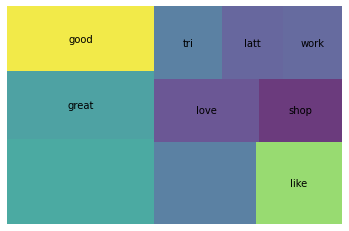

In [40]:
wc_best = count(shops_best['stems'])
wc_top10_best = wc_best[wc_best['rank'] <= 10]
squarify.plot(sizes=wc_top10_best['pct_total'], label=wc_top10_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

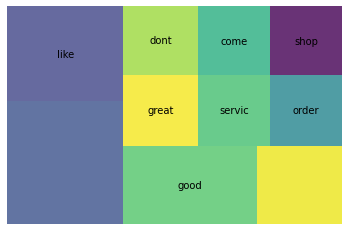

In [41]:
wc_worst = count(shops_worst['stems'])
wc_top10_worst = wc_worst[wc_worst['rank'] <= 10]
squarify.plot(sizes=wc_top10_worst['pct_total'], label=wc_top10_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [42]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [43]:
from tqdm import tqdm 
tqdm.pandas()

C:\Users\Toby\anaconda3\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [44]:
shops_best['lemmas'] = shops_best['full_review_text_clean'].progress_apply(get_lemmas)

100%|██████████| 6140/6140 [02:01<00:00, 50.42it/s]


In [45]:
shops_worst['lemmas'] = shops_worst['full_review_text_clean'].progress_apply(get_lemmas)

100%|██████████| 1476/1476 [00:31<00:00, 46.83it/s]


In [46]:
shops_best['lemmas'].head()

0       [   , checkin, love, love, love, atmosphere, c...
4278    [  , love, place, free, wifi, indoor, outdoor,...
4291    [   , checkin, simply, feel, welcome, coffee, ...
4289    [  , irie, bean, gem, atmosphere, decor, relax...
4287    [   , checkin, love, place,  , great, spot, ha...
Name: lemmas, dtype: object

In [47]:
shops_worst['lemmas'].head()

5780    [  , bullshit, overhype, paleo,  , coffee, pre...
5945    [   ,  , ounce, iced, coffee, absolutely, insa...
5946    [  , normal, circumstance, would, give, place,...
5962    [  , standard, coffee, super, low, fact, not, ...
5971    [  , horrible, slow, service, real, food, menu...
Name: lemmas, dtype: object

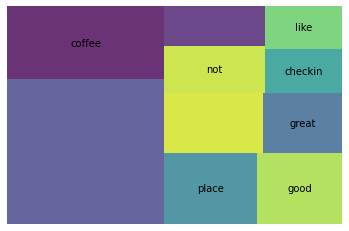

In [48]:
wc_best = count(shops_best['lemmas'])
wc_top10_best = wc_best[wc_best['rank'] <= 10]
squarify.plot(sizes=wc_top10_best['pct_total'], label=wc_top10_best['word'], alpha=.8 )
plt.axis('off')
plt.show()

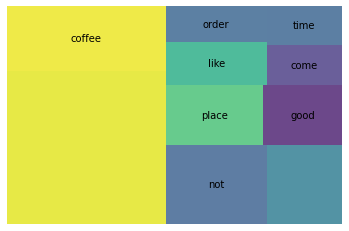

In [49]:
wc_worst = count(shops_worst['lemmas'])
wc_top10_worst = wc_worst[wc_worst['rank'] <= 10]
squarify.plot(sizes=wc_top10_worst['pct_total'], label=wc_top10_worst['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

